University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tueplots import bundles
from tueplots.constants.color import rgb

## Import data

In [6]:
df_dict = {}
folder_path = '../dat/gain-comparison/avg_gain'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[2].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        print(key)
        df_dict[key] = df

print(df_dict['Berlin Hbf'])

Potsdam Hbf
Dortmund Hbf
Duesseldorf Hbf
Koeln Hbf
Nuernberg Hbf
Berlin Hbf
Essen Hbf
Karlsruhe Hbf
Schwerin Hbf
Hamburg Hbf
Erfurt Hbf
Magdeburg Hbf
Wiesbaden Hbf
Bremen Hbf
Muenchen Hbf
Hannover Hbf
Stuttgart Hbf
Saarbruecken Hbf
Kiel Hbf
Mainz Hbf
Leipzig Hbf
Duisburg Hbf
Dresden Hbf
                                                        switch time  \
Mainz Hbf         [50.0, 50.0, 50.0, 50.0, 46.0, 46.0, 50.0, 50....   
Koeln Hbf         [34.0, 34.0, 46.0, 46.0, 46.0, 46.0, 46.0, 10....   
Wiesbaden Hbf     [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....   
Dortmund Hbf      [46.0, 13.0, 30.0, 13.0, 30.0, 46.0, 13.0, 30....   
Essen Hbf         [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Duisburg Hbf      [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Stuttgart Hbf     [28.0, 28.0, 28.0, 54.0, 54.0, 28.0, 28.0, 28....   
Saarbruecken Hbf  [52.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....   
Duesseldorf Hbf   [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Ka

In [7]:
cities = list(df_dict.keys())
cities.sort()
cities

['Berlin Hbf',
 'Bremen Hbf',
 'Dortmund Hbf',
 'Dresden Hbf',
 'Duesseldorf Hbf',
 'Duisburg Hbf',
 'Erfurt Hbf',
 'Essen Hbf',
 'Hamburg Hbf',
 'Hannover Hbf',
 'Karlsruhe Hbf',
 'Kiel Hbf',
 'Koeln Hbf',
 'Leipzig Hbf',
 'Magdeburg Hbf',
 'Mainz Hbf',
 'Muenchen Hbf',
 'Nuernberg Hbf',
 'Potsdam Hbf',
 'Saarbruecken Hbf',
 'Schwerin Hbf',
 'Stuttgart Hbf',
 'Wiesbaden Hbf']

In [8]:
len(cities)

23

In [9]:
df_dict['Hamburg Hbf']

,switch time,date,delay,reachable
Mainz Hbf,"[58.0, 1.0, 58.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0...","[2023-10-03 14:18:00, 2023-04-02 22:18:00, 202...","[18, 61, 7, 60.0, 60.0, 13, 0, 0, 0, 1, 60.0, ...","[3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, ..."
Koeln Hbf,"[58.0, 58.0, 43.0, 3.0, 51.0, 51.0, 3.0, 5.0, ...","[2023-10-03 16:05:00, 2023-10-04 16:05:00, 202...","[33, 1, 0, 29.0, 4, 4, 32.0, 1, 6, 6, 0, 3, 13...","[3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, ..."
Wiesbaden Hbf,"[42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....","[2021-01-21 15:33:00, 2021-01-22 15:33:00, 202...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 198.0, 0, 0, 0,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, ..."
Muenchen Hbf,"[26.0, 26.0, 54.0, 20.0, 54.0, 20.0, 54.0, 20....","[2023-04-11 09:28:00, 2023-04-17 09:28:00, 202...","[0, 4, 0, 2, 0, 0, 0, 3, 0, 0, 0, 11, 0, 28, 4...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
Nuernberg Hbf,"[9.0, 9.0, 16.0, 44.0, 44.0, 44.0, 44.0, 16.0,...","[2023-10-03 15:00:00, 2023-10-04 15:00:00, 202...","[0, 59.0, 59.0, 31, 2, 0, 0, 0, 4, 2, 63.0, 35...","[3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, ..."
Stuttgart Hbf,"[11.0, 22.0, 17.0, 26.0, 17.0, 26.0, 17.0, 26....","[2023-04-02 23:37:00, 2023-10-04 14:38:00, 202...","[1, 31, 74.0, 0, 0, 0, 0, 0, 0, 10, 0, 219.0, ...","[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, ..."
Saarbruecken Hbf,"[11.0, 19.0, 19.0, 19.0, 14.0, 14.0, 19.0, 19....","[2023-02-06 07:59:00, 2023-04-11 07:59:00, 202...","[181.0, 0, 0, 0, 226.0, 0, 0, 0, 0, 221.0, 181...","[2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, ..."
Duesseldorf Hbf,"[25.0, 3.0, 3.0, 1.0, 3.0, 3.0, 25.0, 3.0, 1.0...","[2023-10-03 14:36:00, 2023-02-06 07:35:00, 202...","[7, 65.0, 133.0, 11, 3, 0, 3, 65.0, 7, 0, 10, ...","[3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, ..."
Karlsruhe Hbf,"[22.0, 36.0, 22.0, 22.0, 22.0, 21.0, 36.0, 22....","[2023-04-02 23:09:00, 2023-10-04 14:50:00, 202...","[1, 0, 7, 7, 4, 219.0, 6, 3, 3, 2, 2, 2, 0, 3,...","[3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."


## Mean Delay for each switch time 

In [10]:
switch_times_array = list(range(1,61,1))
empty = pd.DataFrame(columns=['switch_times', 'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
empty.switch_times = switch_times_array
empty['mean_delay'] = [[] for _ in range(60)]
empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0


#for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
#    empty[column] = [np.array([]) for _ in range(60)]
#display(empty.head(2))

# -------------------

delay_matrix = [[] for _ in range(60)]

# data processing
for key, df in df_dict.items():
    
    #display(df.head(2))
    for irow, row in df.iterrows():
        
        #print(row)

        for i, minute in enumerate(row['switch time']):
            
    
            delay = row['delay'][i]
            #print(empty.loc[minute-1, 'mean_delay'])
            #print(type(empty.loc[minute-1, 'mean_delay']))


            #empty.loc[minute-1, 'mean_delay'].append(delay)
            delay_matrix[int(minute-1)].append(delay)

            #print(empty.loc[minute-1, 'mean_delay'])
            

            # Fill the reachable columns
            case = row['reachable'][i]
            if case == 1:
                empty.loc[minute-1, 'reachable1'] += 1
            elif case == 2:
                empty.loc[minute-1, 'reachable2'] += 1
            elif case == 3:
                empty.loc[minute-1, 'reachable3'] += 1
            
            #display(empty)
            #break
   
        #break

means = []
medians = []
for minute in delay_matrix:
    means.append(np.mean(minute).round(2))
    medians.append(np.median(minute).round(2))

#print(means)
empty['mean_delay'] = means
empty['median_delay'] = medians
df_mean_delays = empty

In [11]:
df_mean_delays.head(2)

,switch_times,mean_delay,reachable1,reachable2,reachable3,median_delay
0,1,71.92,4179,35861,22395,61.0
1,2,55.54,5535,51411,59071,43.0


### Plot

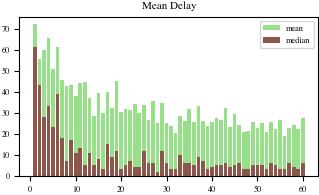

In [12]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update()
x = np.arange(len(df_mean_delays.switch_times))

fig, ax = plt.subplots()
ax.bar(x+1, df_mean_delays.mean_delay, label="mean", color='#98DF8A')
ax.bar(x+1, df_mean_delays.median_delay, label="median", color='#8C564B')

plt.legend()
plt.title('Mean Delay')

plt.show()

12


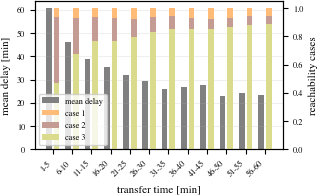

In [13]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
#plt.rcdefaults()
# Generate grouped Data

group_size = 5  # set group size 

grouped_mean_delays = []
#grouped_median_delays = []
grouped_reachable1 = []
grouped_reachable2 = []
grouped_reachable3 = []

for i in range(0, len(df_mean_delays.switch_times), group_size):
    group_sum_mean_delays = np.sum(df_mean_delays.mean_delay[i:i+group_size])
    grouped_mean_delays.append(group_sum_mean_delays)

    #group_sum_median_delays = np.sum(df_mean_delays.median_delay[i:i+group_size])
    #grouped_median_delays.append(group_sum_mean_delays)

    group_sum_reachable1 = np.sum(df_mean_delays.reachable1[i:i+group_size])
    grouped_reachable1.append(group_sum_reachable1)

    group_sum_reachable2 = np.sum(df_mean_delays.reachable2[i:i+group_size])
    grouped_reachable2.append(group_sum_reachable2)

    group_sum_reachable3 = np.sum(df_mean_delays.reachable3[i:i+group_size])
    grouped_reachable3.append(group_sum_reachable3)



print(len(grouped_mean_delays))
x = np.arange(len(grouped_mean_delays))

y_ticks_array = np.arange(0, max(grouped_mean_delays)/group_size+1, 10)



# FIGURE ------------------------------

fig, ax1 = plt.subplots()

width = 0.3
ax1.bar(x+1-0.2, np.array(grouped_mean_delays)/group_size, width, color="grey", label="mean delay")
#ax1.bar(x+1-0.2, np.array(grouped_median_delays)/group_size, width, color='black', alpha=0.2, label="median delay")

#ax1.set_title('Mean Delay in Minutes and distribution of reachability cases \n depending on the switch time in minutes in Frankfurt Hbf \nusing subset data')
ax1.set_xlabel('transfer time [min]')
ax1.set_ylabel('mean delay [min]')
#xticks_array =  [f'{start}\n-\n{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
#ax1.set_xticks(x+1, xticks_array)
ax1.set_yticks(y_ticks_array)
ax1.yaxis.grid("major", alpha=0.2)
xticks_array =  [f'{start}-{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x + 1)
ax1.set_xticklabels(xticks_array, rotation=45, ha='right')  # Rotate labels and set horizontal alignment

# ... [rest of your code] ...

#plt.show()



ax2 = ax1.twinx()

bottom = np.zeros(len(grouped_mean_delays))

reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
bar1 = np.array(grouped_reachable1)/reachables_total
bar2 = np.array(grouped_reachable2)/reachables_total
bar3 = np.array(grouped_reachable3)/reachables_total

ax2.bar(x+1+0.2, bar1, width, color="#FFBB78", label="case 1", bottom=bottom+bar2+bar3)
ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="case 2", bottom=bottom+bar3)
ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="case 3", bottom=bottom)

#ax2.set_yscale()
ax2.set_ylabel('reachability cases')


# Solution for having two legends
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(bars1 + bars2, labels1 + labels2, loc="lower left")

plt.savefig("plot_meanDelay_reachability_switchTime.pdf", format="pdf")

plt.show()

